# Problem Set #2 -- Yiqing Zheng

## Differentiation

## problem 1

In [16]:
import sympy as sy

In [364]:
x = sy.symbols('x')

def func_1(x):
    return (sy.sin(x) + 1)**(sy.sin(sy.cos(x)))

func_1_prime = sy.diff(func_1(x),x)

In [18]:
func_1_lambda = sy.lambdify(x, func_1(x))
func_1_prime_lambda = sy.lambdify(x, func_1_prime)

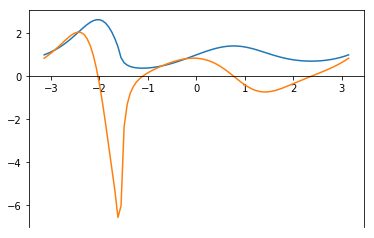

In [398]:
import matplotlib.pyplot as plt
import numpy as np
import math

x_axis = np.linspace(-math.pi, math.pi, 100)
plt.plot(x_axis , func_1_lambda(x_axis))
plt.plot(x_axis, func_1_prime_lambda(x_axis))
ax = plt.gca()
ax.spines["bottom"].set_position("zero")

## problem 2

In [373]:
def forward_1(f, x, h):
    f = sy.lambdify(x_1, f(x_1))
    return (f(x+h)-f(x))/h

In [45]:
def forward_2(f, x, h):
    f = sy.lambdify(x_1, f(x_1))
    return (-3*f(x)+4*f(x+h)-f(x+2*h))/(2*h)

In [33]:
def backward_1(f, x, h):
    f = sy.lambdify(x_1, f(x_1))
    return (f(x)-f(x-h))/h

In [30]:
def backward_2(f, x, h):
    f = sy.lambdify(x_1, f(x_1))
    return (3*f(x)-4*f(x-h)+f(x-2*h))/(2*h)

In [32]:
def centered_2(f, x, h):
    f = sy.lambdify(x_1, f(x_1))
    return (f(x+h)-f(x-h))/(2*h)

In [399]:
def centered_4(f, x, h):
    f = sy.lambdify(x_1, f(x_1))
    return (f(x-2*h)-8*f(x-h)+8*f(x+h)-f(x+2*h))/(12*h)

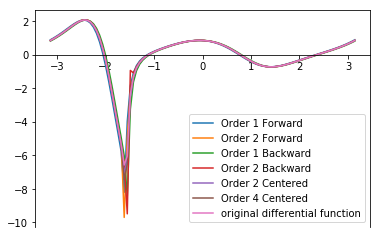

In [376]:
plt.plot(x_axis , forward_1(func_1, x_axis, 0.05), label = "Order 1 Forward");
plt.plot(x_axis , forward_2(func_1, x_axis, 0.05), label = "Order 2 Forward");
plt.plot(x_axis , backward_1(func_1, x_axis, 0.05), label = "Order 1 Backward");
plt.plot(x_axis , backward_2(func_1, x_axis, 0.05), label = "Order 2 Backward");
plt.plot(x_axis , centered_2(func_1, x_axis, 0.05), label = "Order 2 Centered");
plt.plot(x_axis , centered_4(func_1, x_axis, 0.05), label = "Order 4 Centered");
plt.plot(x_axis, func_1_prime_lambda(x_axis), label = "original differential function");
plt.legend();
ax = plt.gca()
ax.spines["bottom"].set_position("zero")

We can learn from the graph above that these finite difference quotients can approximate the derivative of function well, especially for those values above the x axis.

## Problem 3

In [105]:
h_array = np.logspace(-8, 0, 9)

In [71]:
x_0_prime = func_1_prime_lambda(1)

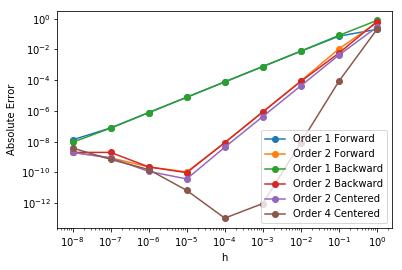

In [400]:
plt.plot(h_array , abs(forward_1(func_1, 1, h_array)-x_0_prime), label = "Order 1 Forward", marker = 'o');
plt.plot(h_array , abs(forward_2(func_1, 1, h_array)-x_0_prime), label = "Order 2 Forward", marker = 'o');
plt.plot(h_array , abs(backward_1(func_1, 1, h_array)-x_0_prime), label = "Order 1 Backward", marker = 'o');
plt.plot(h_array , abs(backward_2(func_1, 1, h_array)-x_0_prime), label = "Order 2 Backward", marker = 'o');
plt.plot(h_array , abs(centered_2(func_1, 1, h_array)-x_0_prime), label = "Order 2 Centered", marker = 'o');
plt.plot(h_array , abs(centered_4(func_1, 1, h_array)-x_0_prime), label = "Order 4 Centered", marker = 'o');
plt.xlabel('h')
plt.ylabel('Absolute Error')
plt.loglog()
plt.legend();

## problem 4

In [147]:
ds = np.load('plane.npy')

In [148]:
# convert degree to radians
alpha_array = np.deg2rad(ds[:,1])
beta_array = np.deg2rad(ds[:,2])
ds = np.insert(ds, 3, alpha_array, axis=1)
ds = np.insert(ds, 4, beta_array, axis=1)

In [149]:
x_array = 500 * (np.tan(beta_array)/(np.tan(beta_array)-np.tan(alpha_array)))
y_array = 500 * (np.tan(beta_array)*np.tan(alpha_array))/(np.tan(beta_array)-np.tan(alpha_array))

In [150]:
ds = np.insert(ds, 5, x_array, axis=1)
ds = np.insert(ds, 6, y_array, axis=1)

In [154]:
for t in range(7,15):
    if t == 7:
        x_prime = ds[1,5] - ds[0,5]
        y_prime = ds[1,6] - ds[0,6]
    elif t == 14:
        x_prime = ds[7,5] - ds[6,5]
        y_prime = ds[7,6] - ds[6,6]
    else:
        x_prime = 0.5*(ds[t-6,5]-ds[t-8,5])
        y_prime = 0.5*(ds[t-6,6]-ds[t-8,6])
    speed = (x_prime**2 + y_prime**2)**0.5     
    print(f'For t = {t}, the speed is {speed}.')

For t = 7, the speed is 46.42420062213486.
For t = 8, the speed is 47.001039380952975.
For t = 9, the speed is 48.99880514036724.
For t = 10, the speed is 50.09944162965284.
For t = 11, the speed is 48.29035083820508.
For t = 12, the speed is 51.56455904927257.
For t = 13, the speed is 53.92303354505342.
For t = 14, the speed is 51.51480056963565.


## problem 5

In [252]:
def jacobian(f, x_0, h):
    m = len(f)
    n = len(x_0)
    #x_0 = np.array(x_0)
    result = np.zeros((n,m))
    identity = np.identity(n)
    # obtain all the symbols
    symbol_set = set()
    for i in range(m):
        symbol_set = symbol_set.union(f[i].atoms(sy.Symbol))
    symbol_list = list(symbol_set)
    for i in range(m):
        for j in range(n):
            f_lambda = sy.lambdify(symbol_list, f[i])
            parameter1 = tuple(x_0+h*identity[j,:])
            parameter2 = tuple(x_0-h*identity[j,:])
            f_prime = (f_lambda(*parameter1)-f_lambda(*parameter2))/(2*h)
            result[i,j] = f_prime
    return result

In [253]:
x = sy.symbols('x')
y = sy.symbols('y')
f1 = x**2
f2 = x**3 - y
f = [f1, f2]

In [256]:
jacobian(f, [1,2],0.01)

array([[ 2.    ,  0.    ],
       [ 3.0001, -1.    ]])

The result is the same as what I did in my scratch work.

## problem 7

In [393]:
import time
from random import random
from autograd import grad
from autograd import numpy as anp
import warnings
warnings.filterwarnings('ignore')

In [386]:
def func_2(x):
    return (np.sin(x)+1)**(np.sin(np.cos(x)))

In [377]:
def centered_4(f, x, h):
    return (f(x-2*h)-8*f(x-h)+8*f(x+h)-f(x+2*h))/(12*h)

In [380]:
f_grad = lambda x: (anp.sin(x)+1)**(anp.sin(anp.cos(x)))
g = grad(f_grad)

In [395]:
def record_time(N): 
    time_sympy = []
    error_sympy = [1e-18]*N
    time_diff = []
    error_diff = []
    time_grad = []
    error_grad = []
    for i in range(N):
        x_0 = np.random.uniform(-math.pi,math.pi)
        start1 = time.clock()
        x = sy.symbols('x')
        f = (sy.sin(x) + 1)**(sy.sin(sy.cos(x)))
        f_prime = sy.lambdify(x, sy.diff(f,x))
        exact_number = f_prime(x_0)
        end1 = time.clock()
        time1 = end1 - start1
        time_sympy.append(time1)
    
        start2 = time.clock()
        y_1 = centered_4(func_2, x_0, 0.01)
        end2 = time.clock()
        error2 = abs(y_1-exact_number)
        error_diff.append(error2)
        time2 = end2 - start2
        time_diff.append(time2)
        
        start3 = time.clock()
        y_2 = g(x_0)
        end3 = time.clock()
        error3 = abs(y_2-exact_number)
        error_grad.append(error3)
        time3 = end3 - start3
        time_grad.append(time3)
    
    plt.scatter(np.array(time_sympy), np.array(error_sympy), label = 'Sympy')
    plt.scatter(np.array(time_diff), np.array(error_diff), label = 'Difference Quotients')
    plt.scatter(np.array(time_grad), np.array(error_grad), label = 'Autograd')
    plt.xlim(1e-5,1)
    plt.ylim(1e-19,1e-5)
    plt.xlabel('Computation Time (seconds)')
    plt.ylabel('Absolute Error')
    plt.loglog();
    plt.legend();

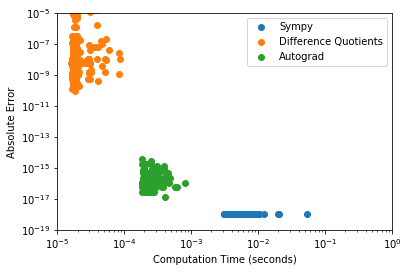

In [396]:
record_time(200);